In [ ]:
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import linkage , dendrogram, fcluster,cophenet
from scipy.spatial.distance import pdist
from yellowbrick.cluster import SilhouetteVisualizer

warnings.filterwarnings("ignore")

In [2]:
penguin_data = pd.read_csv('../b. Datasets/Penguin Morphological Analysis/Penguin Morphological Analysis.csv')

In [3]:
penguin_data.shape

(344, 5)

In [4]:
display(penguin_data.head(2))
display(penguin_data.tail(2))

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
342,45.2,14.8,212.0,5200.0,FEMALE
343,49.9,16.1,213.0,5400.0,MALE


In [5]:
penguin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [6]:
penguin_data.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.50,59.6
culmen_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.70,21.5
flipper_length_mm,342.0,214.014620,260.558057,-132.0,190.000,197.00,213.75,5000.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.00,6300.0


In [7]:
penguin_data.isna().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [8]:
penguin_data.dropna(inplace=True)

In [9]:
penguin_data['sex'] = penguin_data['sex'].apply(lambda x: 1 if x == "MALE" else 0)

In [10]:
penguin_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   335 non-null    float64
 1   culmen_depth_mm    335 non-null    float64
 2   flipper_length_mm  335 non-null    float64
 3   body_mass_g        335 non-null    float64
 4   sex                335 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 15.7 KB


In [11]:
penguin_data.skew()

culmen_length_mm      0.047756
culmen_depth_mm      -0.145627
flipper_length_mm    18.087397
body_mass_g           0.465940
sex                  -0.017992
dtype: float64

In [12]:
quartile_one = penguin_data['flipper_length_mm'].quantile(0.25)
quartile_three = penguin_data['flipper_length_mm'].quantile(0.75)
iqr = quartile_three - quartile_one

upper_bound = quartile_three + 1.5 * iqr
lower_bound = quartile_one - 1.5 * iqr

penguin_data['flipper_length_mm'] = penguin_data['flipper_length_mm'].clip(lower=lower_bound, upper=upper_bound)

In [13]:
penguin_data.skew()

culmen_length_mm     0.047756
culmen_depth_mm     -0.145627
flipper_length_mm    0.325352
body_mass_g          0.465940
sex                 -0.017992
dtype: float64

In [14]:
display(penguin_data.head(2))
display(penguin_data.tail(2))

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
342,45.2,14.8,212.0,5200.0,0
343,49.9,16.1,213.0,5400.0,1


<Axes: >

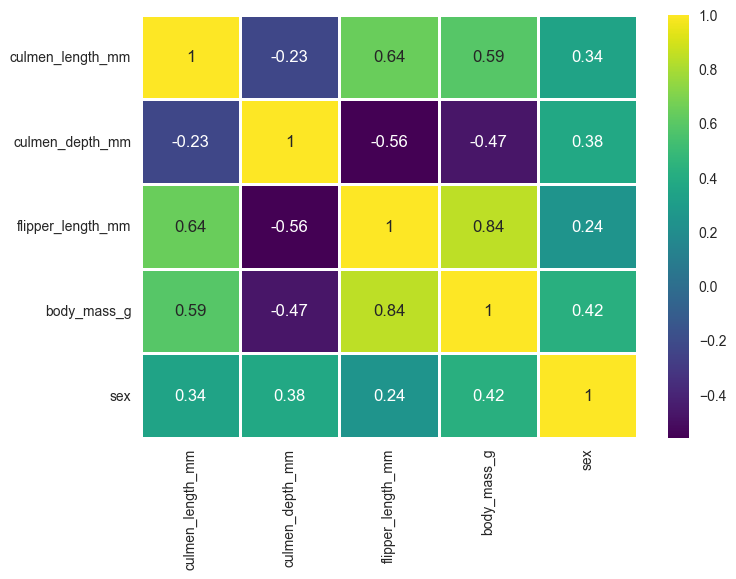

In [15]:
sns.heatmap(penguin_data.corr(), annot=True, cmap='viridis', linewidths=0.8, linecolor='white')

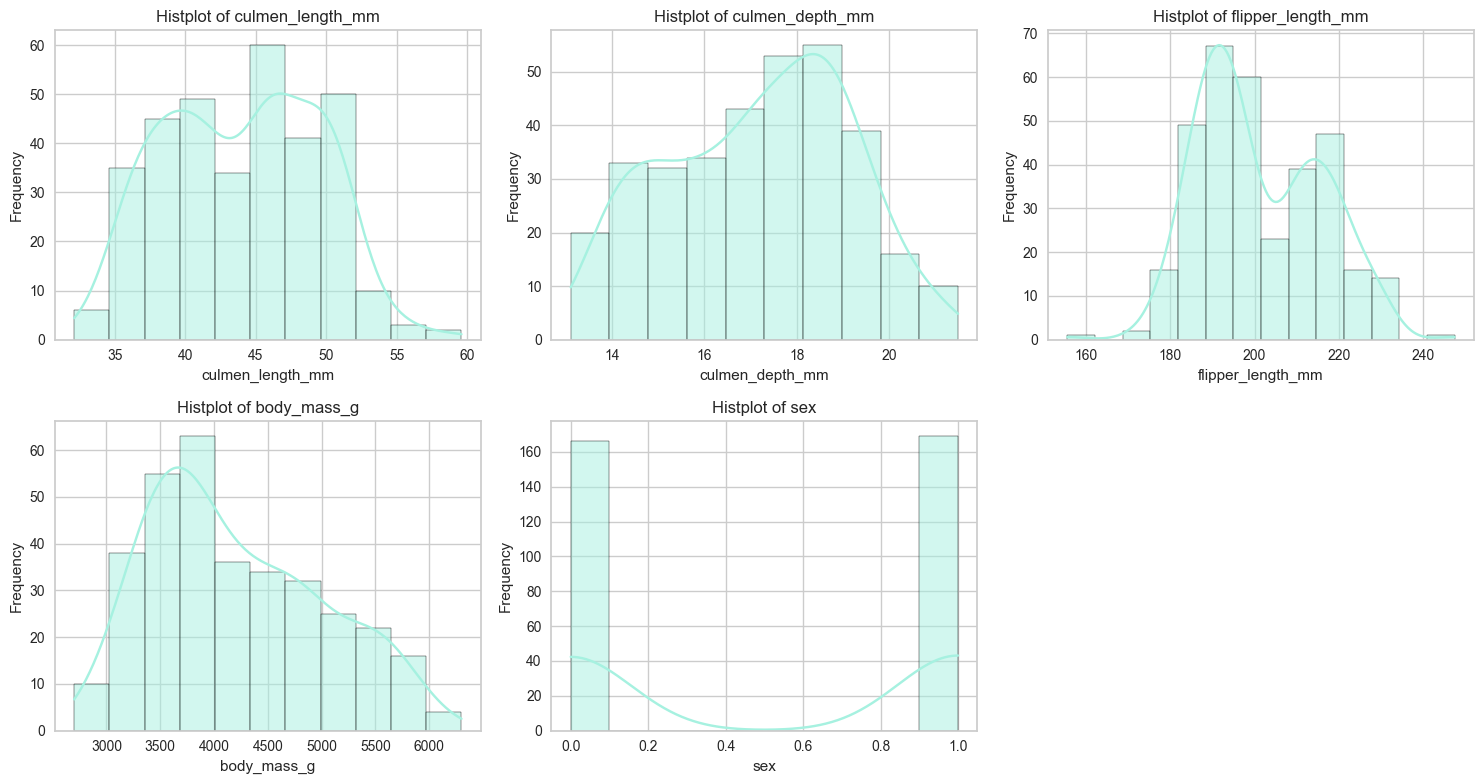

In [16]:
num_columns = penguin_data.select_dtypes(include='number').columns

n_cols = 3 
n_rows = (len(num_columns) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))

axes = axes.flatten()

for i, column in enumerate(num_columns):
    sns.histplot(data=penguin_data, x=column, ax=axes[i], kde=True, color='#A6F1E0')
    axes[i].set_title(f'Histplot of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [17]:
standard_scaler = StandardScaler()
penguin_data_features = penguin_data.columns
penguin_data = pd.DataFrame(data=standard_scaler.fit_transform(penguin_data), 
                            columns=penguin_data_features)

In [18]:
display(penguin_data.head(2))
display(penguin_data.tail(2))

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,-0.897723,0.777263,-1.388431,-0.572233,0.991085
1,-0.824265,0.117037,-1.041789,-0.509923,-1.008996


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
333,0.222512,-1.203417,0.760750,1.234771,-1.008996
334,1.085644,-0.543190,0.830079,1.484013,0.991085


In [19]:
pca = PCA(n_components=0.95)
pca_data = pca.fit_transform(penguin_data)

In [20]:
explained_variance_val = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_val)
num_components = np.argmax(cumulative_variance) + 1

print("Explained variance:", explained_variance_val)
print("Cumulative variance:", cumulative_variance)
print("Number of components that capture 90% of the variance:", num_components)

Explained variance: [0.56031644 0.28204112 0.09667073 0.03659789]
Cumulative variance: [0.56031644 0.84235756 0.93902828 0.97562618]
Number of components that capture 90% of the variance: 4


In [21]:
pca_data = pd.DataFrame(pca_data, columns=['PC' + str(index) for index in range(1, num_components+1)])

In [22]:
display(pca_data.head(2))
display(pca_data.tail(2))

,PC1,PC2,PC3,PC4
0,-1.550264,1.184822,-0.604818,-0.678308
1,-1.516407,-0.727070,-0.046259,0.007922


,PC1,PC2,PC3,PC4
333,1.388514,-1.497072,-0.216504,0.254349
334,2.197416,0.547593,-0.141974,-0.322315


In [23]:
cluster_range = range(2, 10)
silhouette_score_vals = []
inertia_vals = []

for k in cluster_range:
    k_means_model = KMeans(n_clusters=k, 
                           init='k-means++', 
                           max_iter=300)
    cluster_labels = k_means_model.fit_predict(pca_data)
    silhouette_score_vals.append(silhouette_score(pca_data, cluster_labels))
    inertia_vals.append(k_means_model.inertia_)
    
print("Inertia values:", inertia_vals)
print("Silhouette scores:", silhouette_score_vals)

Inertia values: [863.5497807576953, 558.4693264406321, 456.32040870016647, 261.28195946634924, 195.54037340034688, 230.56592053995814, 162.67090126377553, 169.28315511040134]
Silhouette scores: [0.45140851562080736, 0.4654947927129595, 0.4674844213332213, 0.5447307337561895, 0.553509711927856, 0.46093789766138676, 0.4506884272121556, 0.3830141631439379]


In [24]:
kneedle = KneeLocator(cluster_range, 
                      inertia_vals, 
                      curve='convex', 
                      direction='decreasing')
optimum_clusters = kneedle.elbow
print("The optimum number of clusters by the Knee Locator (Elbow method) is", optimum_clusters)

The optimum number of clusters by the Knee Locator (Elbow method) is 5


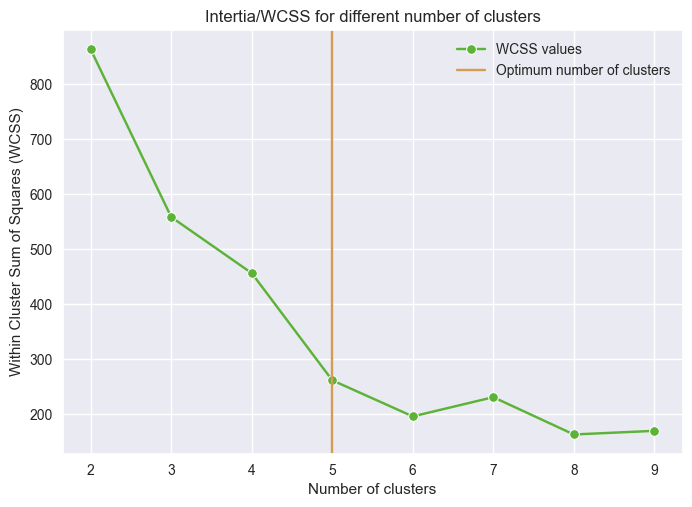

In [25]:
sns.set_style('darkgrid')
sns.lineplot(y=inertia_vals, x=cluster_range, marker='o', color='#5CB338', label="WCSS values")
plt.xticks(cluster_range)
plt.axvline(x=optimum_clusters, color='#D39D55', label='Optimum number of clusters')
plt.xlabel("Number of clusters")
plt.ylabel("Within Cluster Sum of Squares (WCSS)")
plt.title("Intertia/WCSS for different number of clusters")
plt.legend()
plt.show()

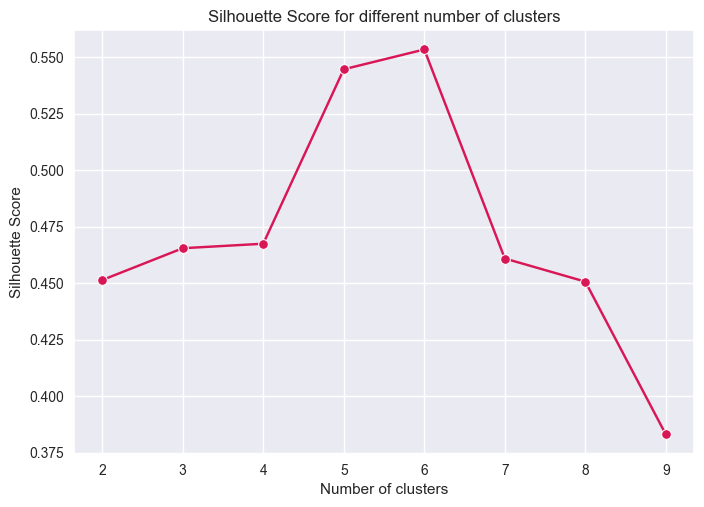

In [26]:
sns.set_style('darkgrid')
sns.lineplot(y=silhouette_score_vals, x=cluster_range, marker='o', color='#D91656')
plt.xticks(cluster_range)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for different number of clusters")
plt.show()

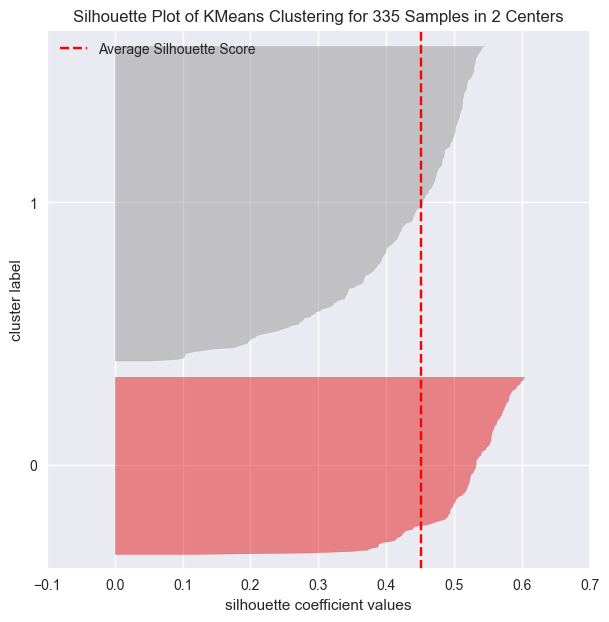

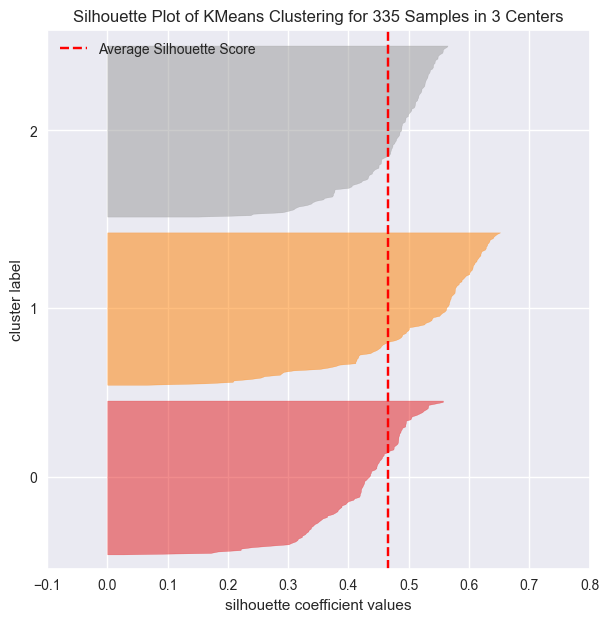

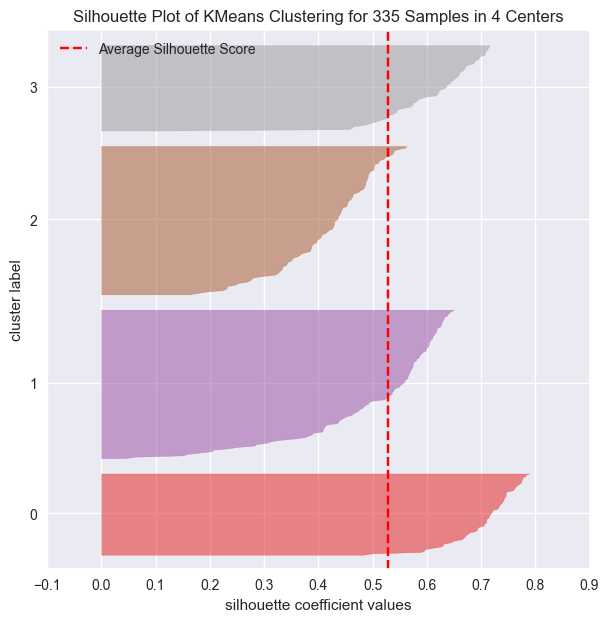

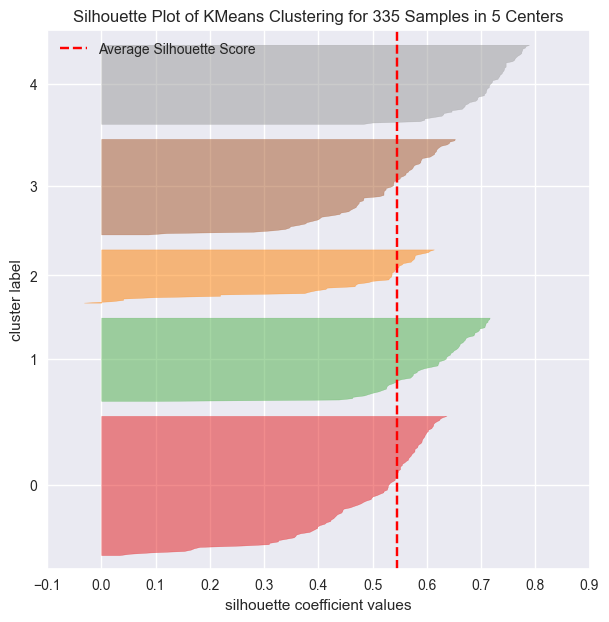

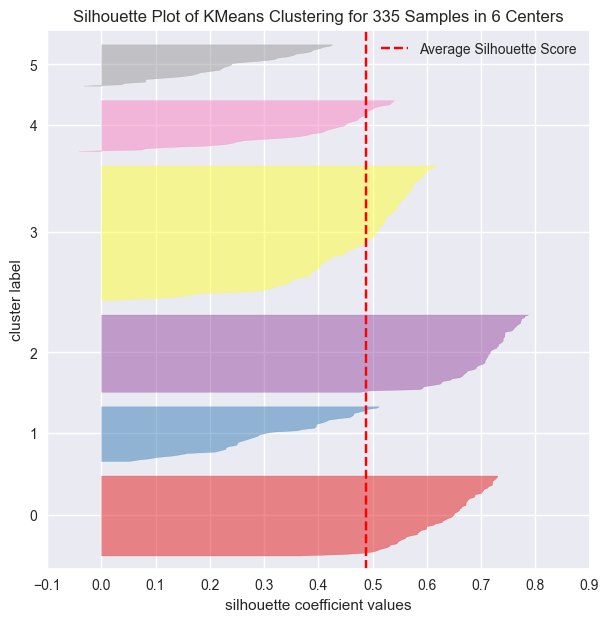

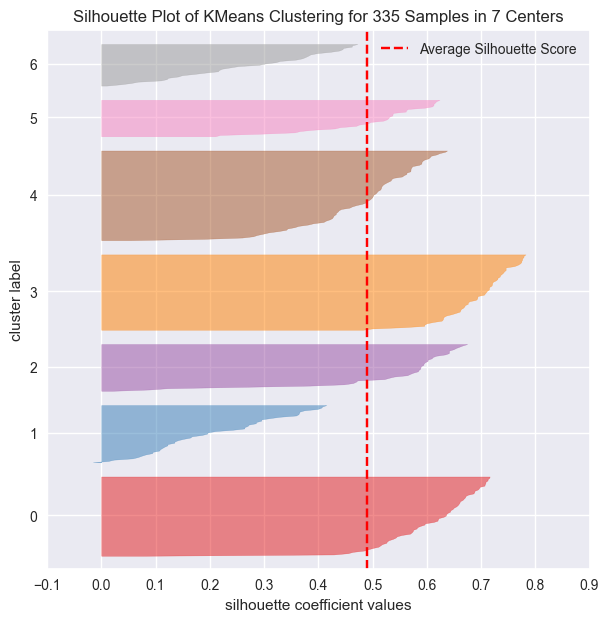

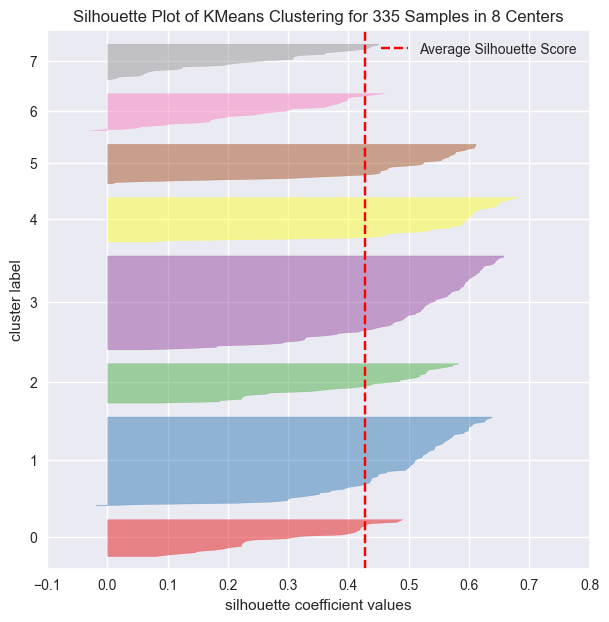

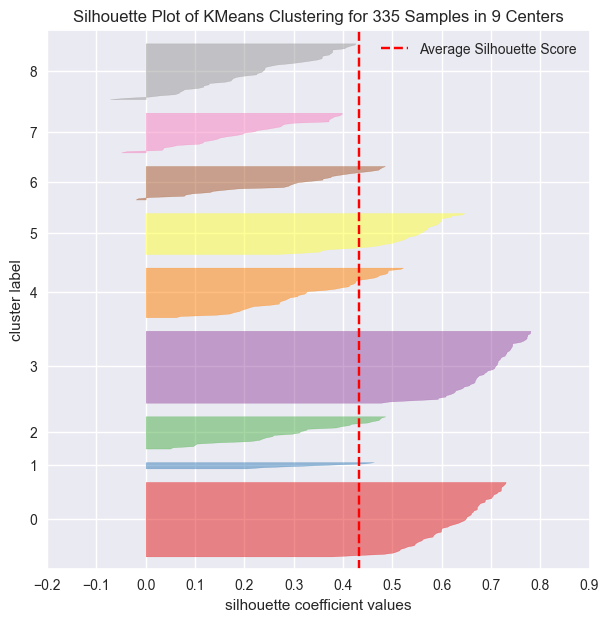

In [27]:
for k in cluster_range:
    plt.figure(figsize=(7, 7))
    model = SilhouetteVisualizer(estimator=KMeans(k))
    model.fit(pca_data)
    model.show()

In [28]:
optimum_clusters = 6

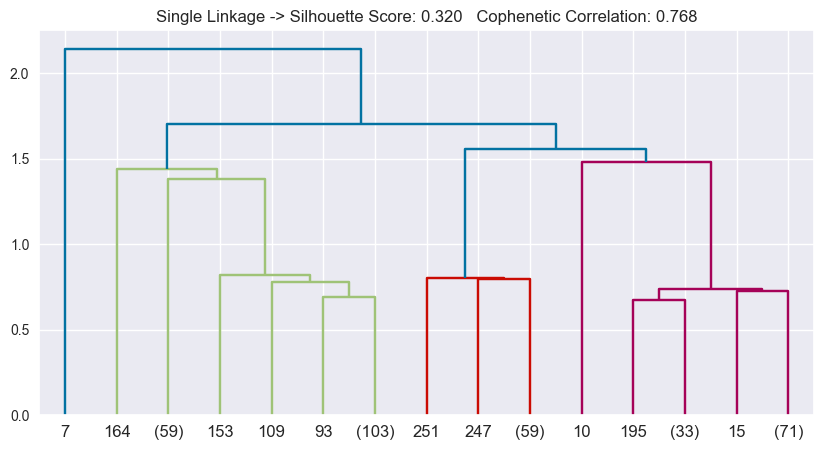

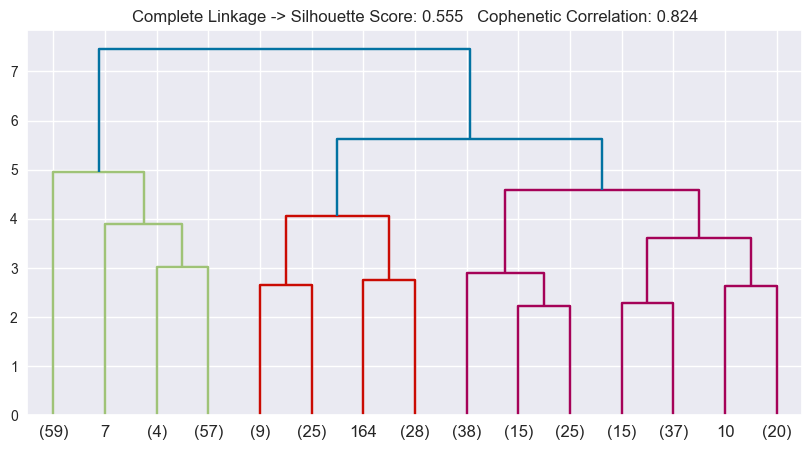

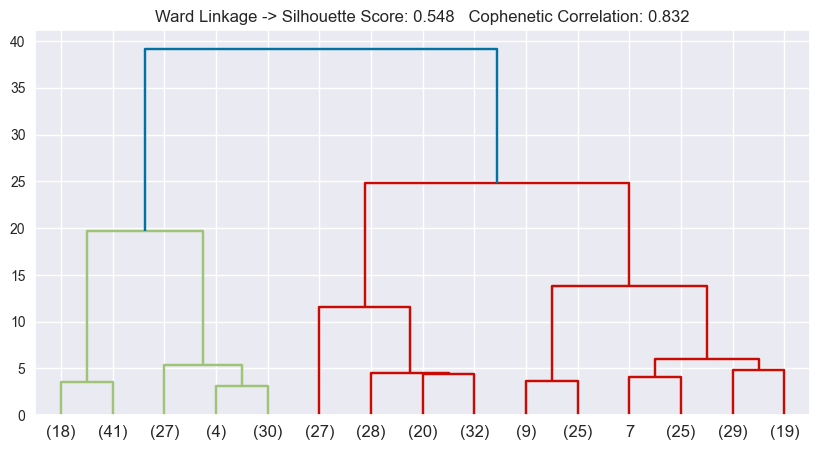

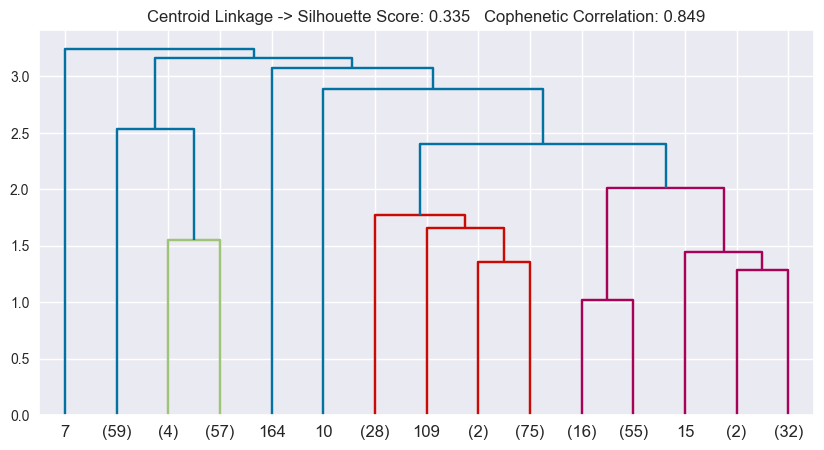

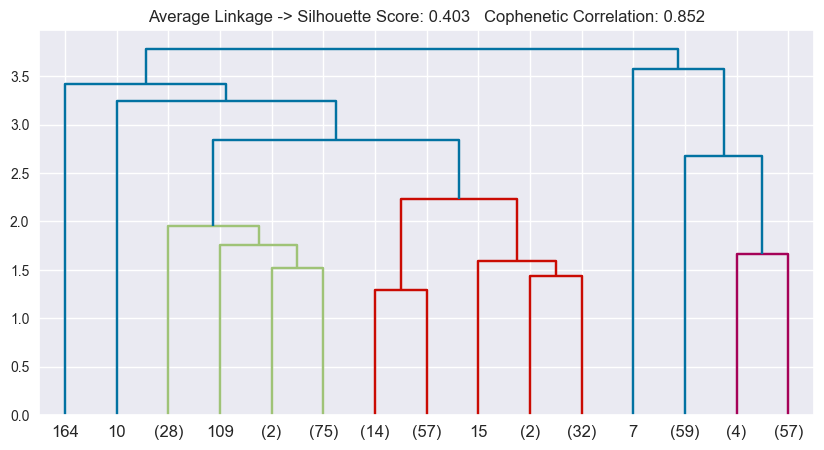

In [29]:
cophenetic_correlation_strs = []
silhouette_scores_strs = []
for linkage_method in ['single', 'complete', 'ward', 'centroid', 'average']:
    plt.figure(figsize=(10, 5))
    linkage_matrix = linkage(pca_data, 
                             method=linkage_method, 
                             metric='euclidean')
    dendrogram(linkage_matrix, p=15, truncate_mode='lastp')
    coph_corr, _ = cophenet(linkage_matrix, pdist(pca_data))
    cluster_labels = fcluster(linkage_matrix, t=optimum_clusters, criterion='maxclust')
    silhouette = silhouette_score(pca_data, cluster_labels)
    cophenetic_correlation_strs.append(f"Cophenetic Correlation for {linkage_method}: {coph_corr:.4f}")
    silhouette_scores_strs.append(f"Silhouette Score for {linkage_method}: {silhouette:.4f}")
    title_string = linkage_method.title() + " Linkage -> Silhouette Score: " + str(silhouette)[:5] + "   Cophenetic Correlation: " + str(coph_corr)[:5]
    plt.title(title_string)
    plt.show()

In [30]:
cophenetic_correlation_strs

['Cophenetic Correlation for single: 0.7683',
 'Cophenetic Correlation for complete: 0.8241',
 'Cophenetic Correlation for ward: 0.8323',
 'Cophenetic Correlation for centroid: 0.8491',
 'Cophenetic Correlation for average: 0.8529']

In [31]:
silhouette_scores_strs

['Silhouette Score for single: 0.3204',
 'Silhouette Score for complete: 0.5553',
 'Silhouette Score for ward: 0.5484',
 'Silhouette Score for centroid: 0.3360',
 'Silhouette Score for average: 0.4032']

In [32]:
print("Based on the silhouette score AND the cophenetic coefficient, ward distance seems to be best.")

Based on the silhouette score AND the cophenetic coefficient, ward distance seems to be best.


In [33]:
k_means_model = KMeans(n_clusters=optimum_clusters)

cluster_labels = k_means_model.fit_predict(pca_data)
centroids = k_means_model.cluster_centers_
cluster_wcss = {}

pca_array = pca_data.to_numpy()

for cluster in range(optimum_clusters):
    cluster_points = pca_array[cluster_labels == cluster]
    centroid = centroids[cluster]
    wcss_cluster = np.sum((cluster_points - centroid) ** 2)
    cluster_wcss[cluster] = wcss_cluster

In [34]:
cluster_wcss

{0: 39.20227734628064,
 1: 45.38769922703383,
 2: 50.99440600098821,
 3: 20.593506376814737,
 4: 18.832929638601183,
 5: 20.637323156841454}

In [35]:
penguin_data_kmeans = pca_data.copy(deep=True)
penguin_data_agglomerative = pca_data.copy(deep=True)
penguin_data_dbscan = pca_data.copy(deep=True)

In [36]:
k_means_model = KMeans(n_clusters=optimum_clusters)
aggomerative_model = AgglomerativeClustering(n_clusters=optimum_clusters)
db_scan_model = DBSCAN()
penguin_data_kmeans['Cluster'] = k_means_model.fit_predict(penguin_data)
penguin_data_agglomerative['Cluster'] = aggomerative_model.fit_predict(penguin_data)
penguin_data_dbscan['Cluster'] = db_scan_model.fit_predict(penguin_data)

print("Silhouette score - KMeans", silhouette_score(penguin_data_kmeans, penguin_data_kmeans['Cluster']))
print("Silhouette score - Agglomerative", silhouette_score(penguin_data_agglomerative, penguin_data_agglomerative['Cluster']))
print("Silhouette score - DBScan", silhouette_score(penguin_data_dbscan, penguin_data_dbscan['Cluster']))
print("\nDavies-Bouldin Index - KMeans:", davies_bouldin_score(penguin_data_agglomerative, penguin_data_agglomerative['Cluster']))
print("Davies-Bouldin Index - Agglomerative:", davies_bouldin_score(penguin_data_kmeans, penguin_data_kmeans['Cluster']))
print("Davies-Bouldin Index - DBScan:", davies_bouldin_score(penguin_data_dbscan, penguin_data_dbscan['Cluster']))

Silhouette score - KMeans 0.6830427988544762
Silhouette score - Agglomerative 0.6863948527918611
Silhouette score - DBScan 0.4973305957363992

Davies-Bouldin Index - KMeans: 0.46275881125851587
Davies-Bouldin Index - Agglomerative: 0.463175087910455
Davies-Bouldin Index - DBScan: 0.7745124402694484


In [37]:
print("For Silhouette score, higher is generally better. For Davies-Bouldin Index, lower is better.")

For Silhouette score, higher is generally better. For Davies-Bouldin Index, lower is better.


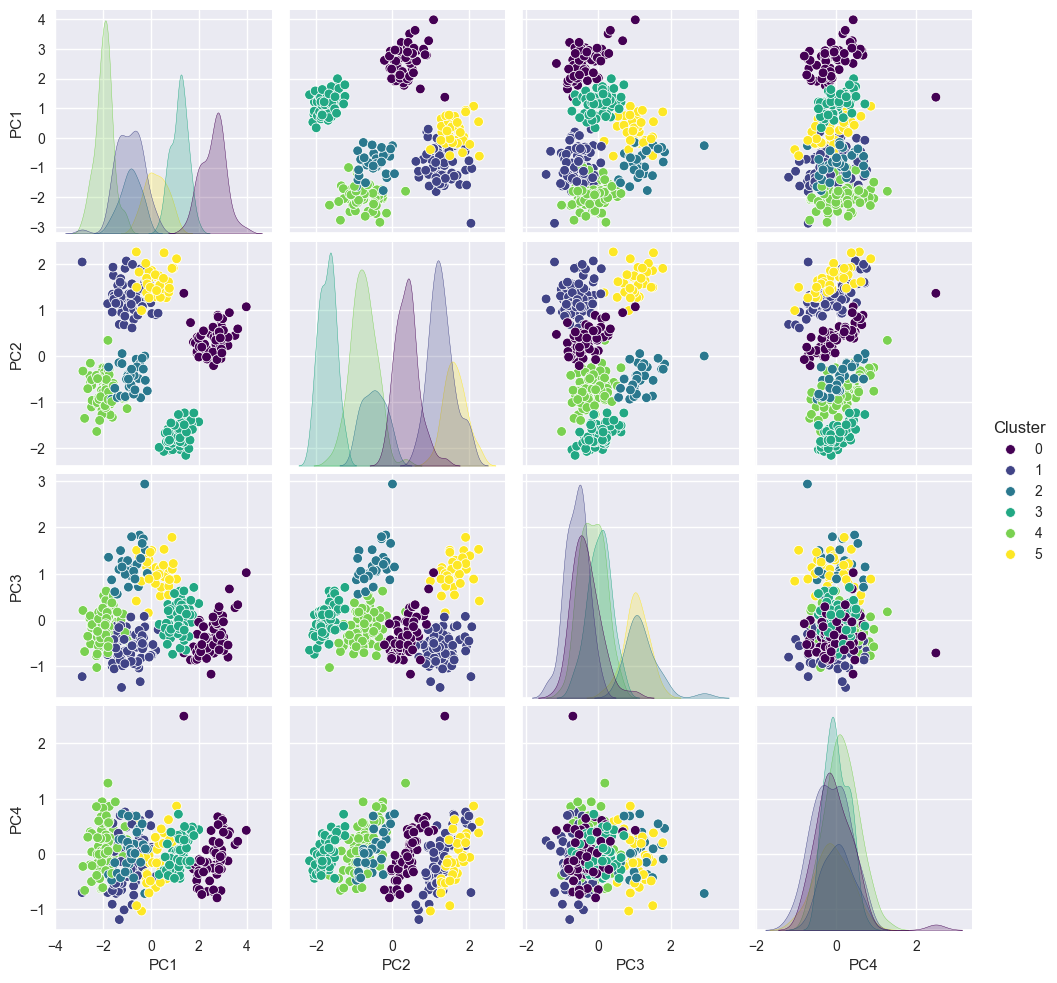

In [38]:
sns.pairplot(penguin_data_kmeans, hue='Cluster', diag_kind='kde', palette='viridis')
plt.show()

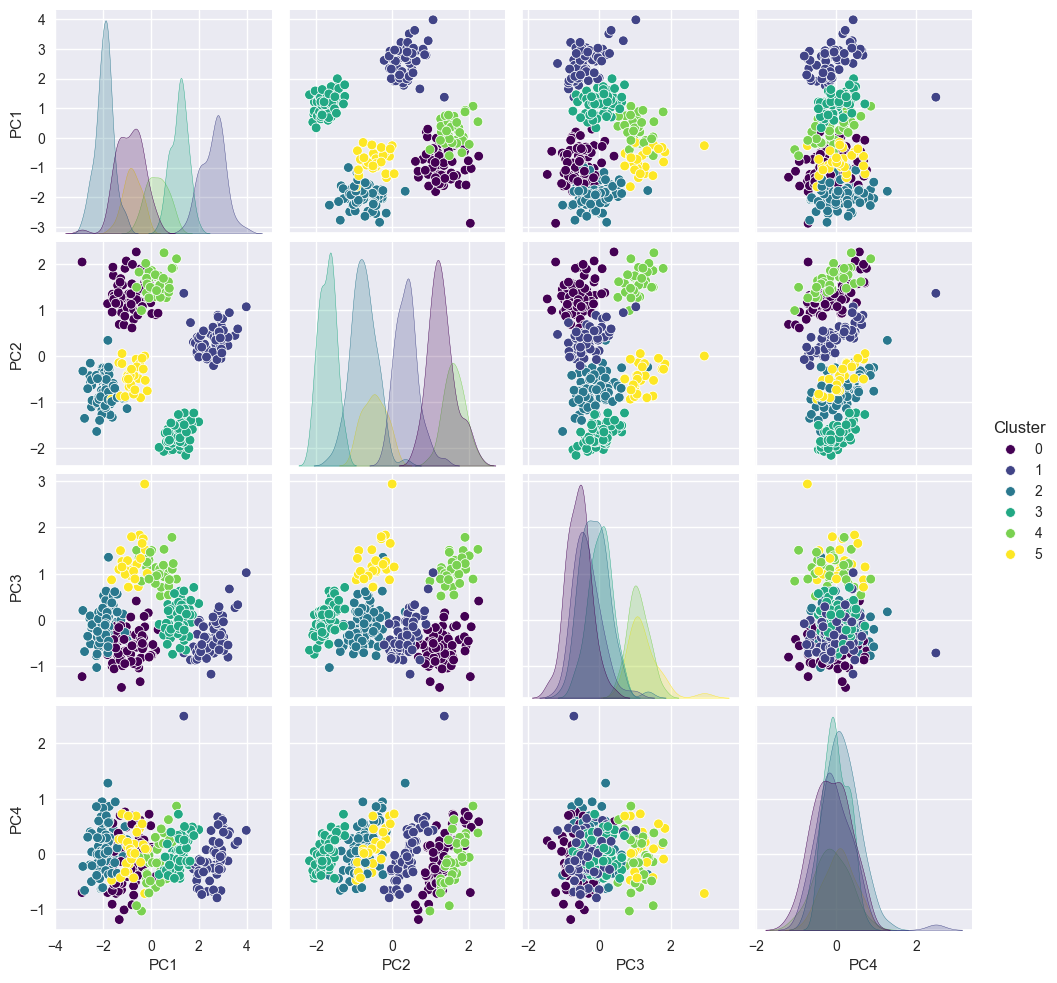

In [39]:
sns.pairplot(penguin_data_agglomerative, hue='Cluster', diag_kind='kde', palette='viridis')
plt.show()

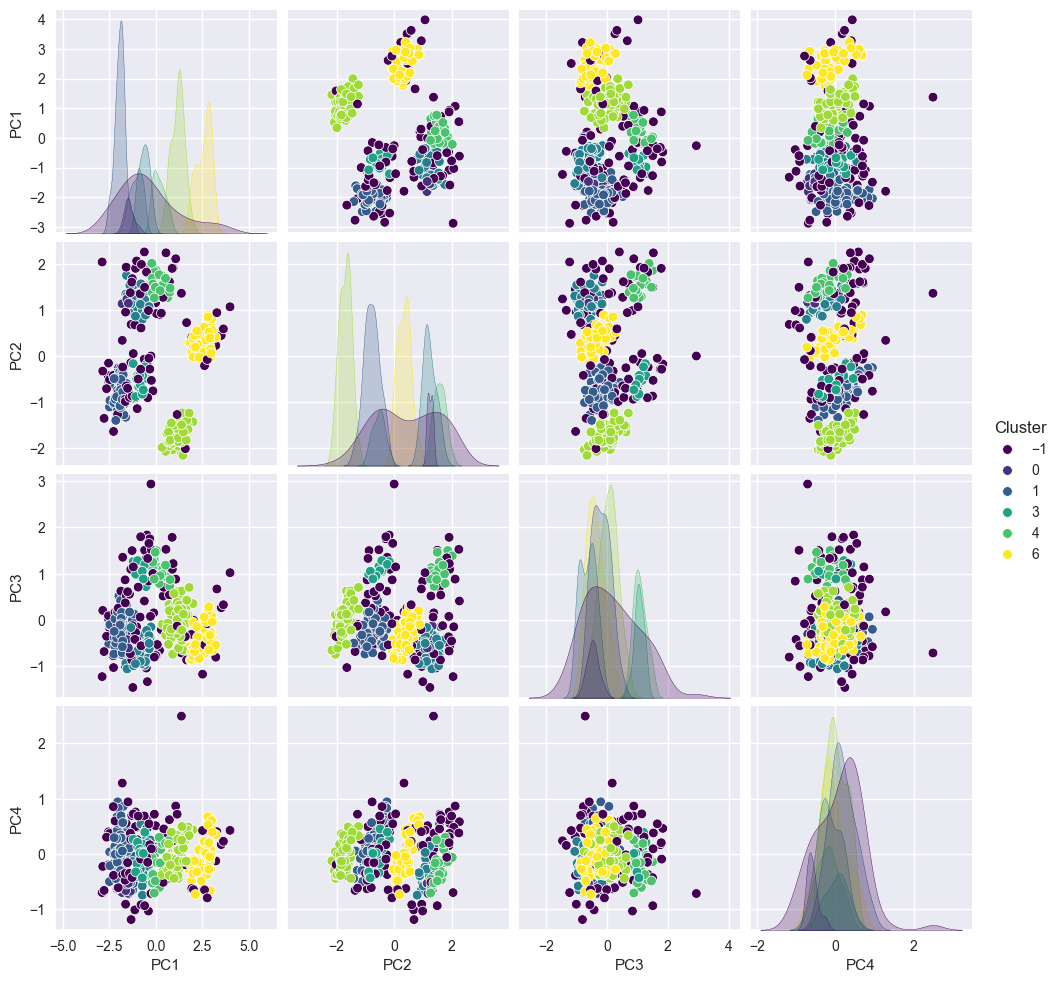

In [40]:
sns.pairplot(penguin_data_dbscan, hue='Cluster', diag_kind='kde', palette='viridis')
plt.show()

In [41]:
submission_df_kmeans = pd.DataFrame({
    'Index': penguin_data_kmeans.index,
    'Cluster': penguin_data_kmeans['Cluster']
}).sort_values(by='Index', ascending=True)
display(submission_df_kmeans.head(2))
display(submission_df_kmeans.tail(2))

,Index,Cluster
0,0,1
1,1,4


,Index,Cluster
333,333,3
334,334,0


In [42]:
submission_df_agglomerative = pd.DataFrame({
    'Index': penguin_data_agglomerative.index,
    'Cluster': penguin_data_agglomerative['Cluster']
}).sort_values(by='Index', ascending=True)
display(submission_df_agglomerative.head(2))
display(submission_df_agglomerative.tail(2))

,Index,Cluster
0,0,0
1,1,2


,Index,Cluster
333,333,3
334,334,1


In [43]:
submission_df_dbscan = pd.DataFrame({
    'Index': penguin_data_dbscan.index,
    'Cluster': penguin_data_dbscan['Cluster']
}).sort_values(by='Index', ascending=True)
display(submission_df_dbscan.head(2))
display(submission_df_dbscan.tail(2))

,Index,Cluster
0,0,0
1,1,1


,Index,Cluster
333,333,5
334,334,6


In [44]:
submission_df_kmeans.to_csv('../d. Output Files/Penguin Morphological Analysis/Penguin Morphological Analysis - KMeans.csv', index=False)
submission_df_agglomerative.to_csv('../d. Output Files/Penguin Morphological Analysis/Penguin Morphological Analysis - Agglomerative.csv', index=False)
submission_df_dbscan.to_csv('../d. Output Files/Penguin Morphological Analysis/Penguin Morphological Analysis - DBScan.csv', index=False)